## Energy Yield Prediction from a Gas Turbine

### Context

Today, gas turbines are one of the most widely-used power generating technologies. Atmospheric air is mixed with fuel and ignited, producing high pressurized gas that is used turn a turbine to produce electricity. The process also produces exhaust gas (flue gas) in the form of CO and NOx which need to be monitored to prevent them getting to the atmosphere. As widely used as it is, the process only gives off an energy coversion efficiency of between 30% to 40%, with the remaining energy lost mostly as heat, and some flue gas emmissions. The data has been collected over the date range (01.01.2011 - 31.12.2015) and comes from the gas turbine of a power plant located in the north western region of Turkey, and can also be used in predicting turbine energy yield using ambient variables as features. Given the low conversion efficiency of the gas turbine, we can see why great importance is attached to being able to predict energy yield from the process.  
 

### Objective:
The objective is to build a predictive model on this data to help the company in predicting turbine gas yield daily.

 
### Dataset:
- Ambient Temperature (AT: measured in Celsius)
- Ambient Pressre (AP: measured in mbar)
- Anbient Humidity (AH: measured in %)
- Air Filter Difference Pressure (AFDP: measured in mbar)
- Gas Turbine Exhaust Pressure (GTEP: measured in mbar)
- Turbine Inlet Temperature (TIT: measured in Celsius)
- Turbine After Temperature (TAT: measured in Celsius )
- Compressor Discharge Pressure (CDP: measured in mbar)
- Turbine Energy Yield (TEY: measured in MWH)
- Carbon Monoxide (CO: measured in mg/m3)
- Nitrogen Oxides (NOx: measured in mg/m3)



In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# To suppress the warnings
import warnings

warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

### Loading Data

In [2]:
Energy_Yield = pd.read_csv("C:/Users/Ikenn/Downloads/gt_2011-2015.csv")

In [3]:
# verifying shape of the data
print(f"There are {Energy_Yield.shape[0]} rows and {Energy_Yield.shape[1]} columns.")

There are 36733 rows and 11 columns.


### Data Overview

In [4]:
# Creating a copy of the data
df = Energy_Yield.copy()

In [5]:
# let's view a sample of the data
df.sample(n=10, random_state=23)

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
31518,21.7910,1006.9,47.021,3.5709,32.769,1086.6,549.88,135.78,12.236,2.10580,63.324
29636,4.5777,1018.2,82.792,4.1251,33.319,1100.0,531.46,165.22,14.134,2.91040,59.596
7175,11.6820,1006.9,89.882,4.1982,24.547,1086.2,549.96,134.51,11.797,1.30910,75.796
35397,11.8020,1019.8,79.831,2.6068,18.761,1046.9,549.87,109.72,10.406,5.37870,62.281
34039,23.9660,1011.9,80.953,3.7988,25.185,1082.0,549.89,131.53,12.047,1.73570,51.817
2349,13.9160,1007.5,99.155,3.1737,19.583,1054.1,547.56,112.87,10.520,6.42360,70.664
28504,12.1780,1014.8,68.478,3.6516,31.628,1096.4,534.48,156.74,13.647,0.55817,59.225
25069,27.5050,1006.4,60.952,4.6516,30.910,1100.0,544.26,149.83,13.275,1.76500,57.624
5263,29.4190,1008.8,61.213,3.3202,21.019,1063.9,550.11,112.75,10.954,1.36180,48.029
13511,18.3950,1012.7,94.029,4.0934,22.458,1074.0,550.03,122.85,11.312,3.71380,63.884


In [6]:
# let's check the data types of the columns in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36733 entries, 0 to 36732
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      36733 non-null  float64
 1   AP      36733 non-null  float64
 2   AH      36733 non-null  float64
 3   AFDP    36733 non-null  float64
 4   GTEP    36733 non-null  float64
 5   TIT     36733 non-null  float64
 6   TAT     36733 non-null  float64
 7   TEY     36733 non-null  float64
 8   CDP     36733 non-null  float64
 9   CO      36733 non-null  float64
 10  NOX     36733 non-null  float64
dtypes: float64(11)
memory usage: 3.1 MB


* All data types are of the numerical type.
* Each column also has 36733 entries indicating no missing values.

In [7]:
# let's view the statistical summary of the columns in the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AT,36733.0,17.712726,7.447451,-6.234800,11.7810,17.8010,23.6650,37.1030
AP,36733.0,1013.070165,6.463346,985.850000,1008.8000,1012.6000,1017.0000,1036.6000
AH,36733.0,77.867015,14.461355,24.085000,68.1880,80.4700,89.3760,100.2000
AFDP,36733.0,3.925518,0.773936,2.087400,3.3556,3.9377,4.3769,7.6106
GTEP,36733.0,25.563801,4.195957,17.698000,23.1290,25.1040,29.0610,40.7160
TIT,36733.0,1081.428084,17.536373,1000.800000,1071.8000,1085.9000,1097.0000,1100.9000
TAT,36733.0,546.158517,6.842360,511.040000,544.7200,549.8800,550.0400,550.6100
TEY,36733.0,133.506404,15.618634,100.020000,124.4500,133.7300,144.0800,179.5000
CDP,36733.0,12.060525,1.088795,9.851800,11.4350,11.9650,12.8550,15.1590
CO,36733.0,2.372468,2.262672,0.000388,1.1824,1.7135,2.8429,44.1030


**Observations**
* `Ambient Temperature:` Typical Turkey weather is between -1 Celsius and 32 Celcius. Max and min values of -6 Celsius and 37 Celsius aren't unheard of. 
* `Carbon Monoxide:` Maximum values for CO seem to be on the high side. 75% of values fall below 2.84 mg/m3, but max values are at 44 mg/m3- a whooping 94% increase. This might insinuate outliers in the dataset. Further analysis would be needed.

## Exploratory Data Analysis

### Univariate analysis

In [8]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency 
# and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical 
# variable.
# This function takes the numerical column as the input and returns the boxplots 
# and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,color = 'orange') if bins else sns.distplot(feature, kde=False, ax=ax_hist2,color='tab:cyan') # For histogram
    ax_hist2.axvline(np.mean(feature), color='purple', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

#### Observations on Ambient Temperature

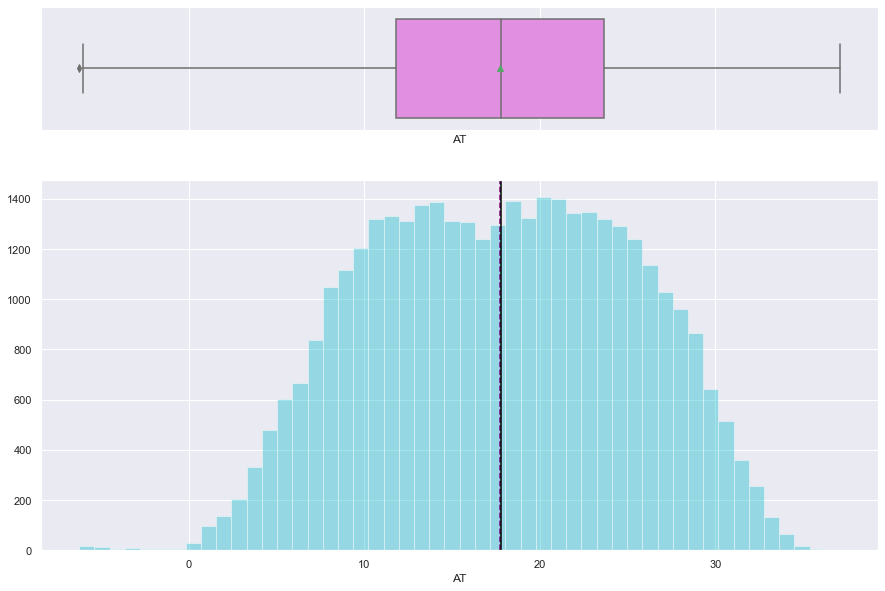

In [9]:
histogram_boxplot(df['AT'])

* The distribution of Ambient Temperature is normally distributed with mean and median at 17.7 Celsius.
* From the boxplot, we can see that there are a few outliers on the left. We won't treat these as it will lead us to loss of information.

#### Observations on Ambient Pressure

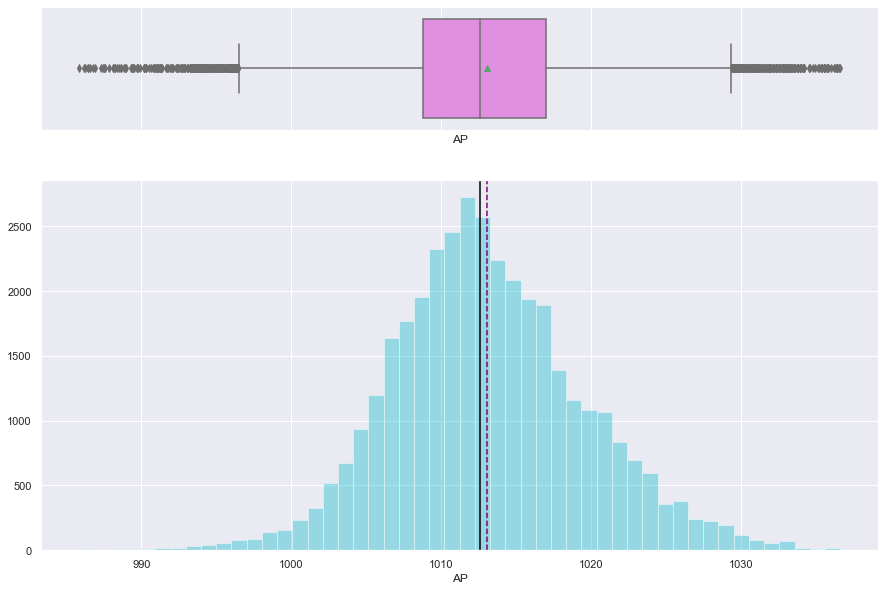

In [10]:
histogram_boxplot(df['AP'])

* The distribution of Ambient Pressure is normally distributed with mean and median at about 1012 mbar.
* From the boxplot, we can see that there are a fair amount of outliers. 

#### Observations on Ambient Humidity

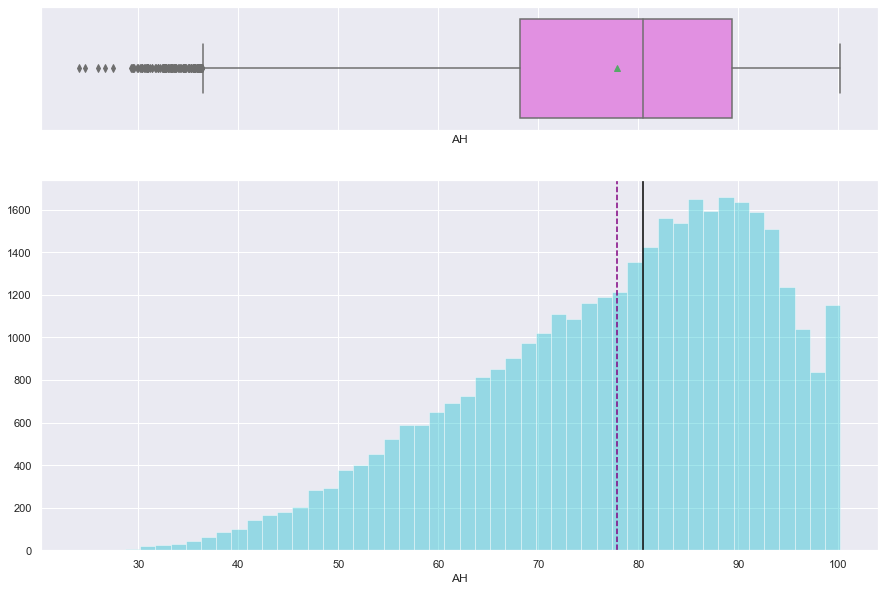

In [11]:
histogram_boxplot(df["AH"])

* The distribution of the Ambient Humidity is skewed to the left.
* There are quite a few values with a minimum score of less than 37%.
* The 50% mark of the total number of AH values comes at about 81%.
* The graph also indictaes that there was a lot of humidity in the air most of the time. 

#### Observations on Air Filter Difference Pressure

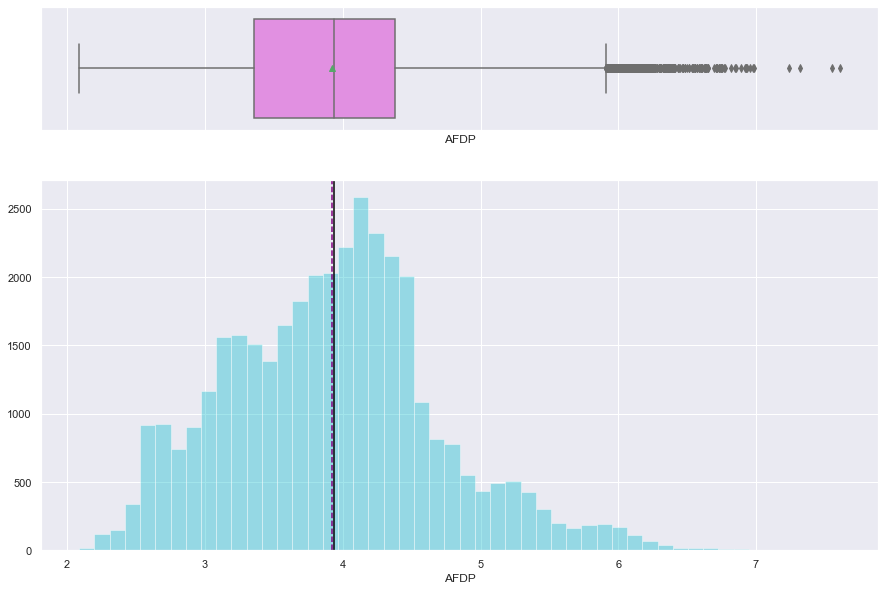

In [12]:
histogram_boxplot(df["AFDP"])

* The distribution of the AFDP is right-skewed. 
* A right-skewed distribution indicates that most of the time, the turbine operated at optimal flow with very little blockage as indicated by the majority of values being on  the low end of AFDP (< 4 mbar). Very few counts on the high side.

#### Observations on Gas Turbine Exhaust Pressure

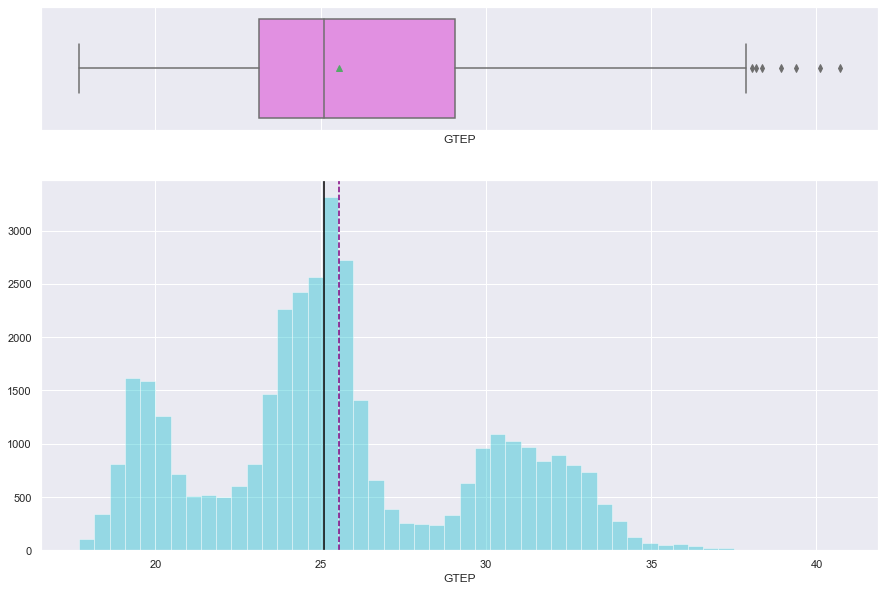

In [13]:
histogram_boxplot(df["GTEP"])

* The distribution of GTEP shows three peaks on 20, 25, and 30 mbar for the 5 year duration which indicates that the exhaust pressure counts were most at these values, with 25mbar baing the most frequent. 

#### Observations on Turbine Inlet Temperature

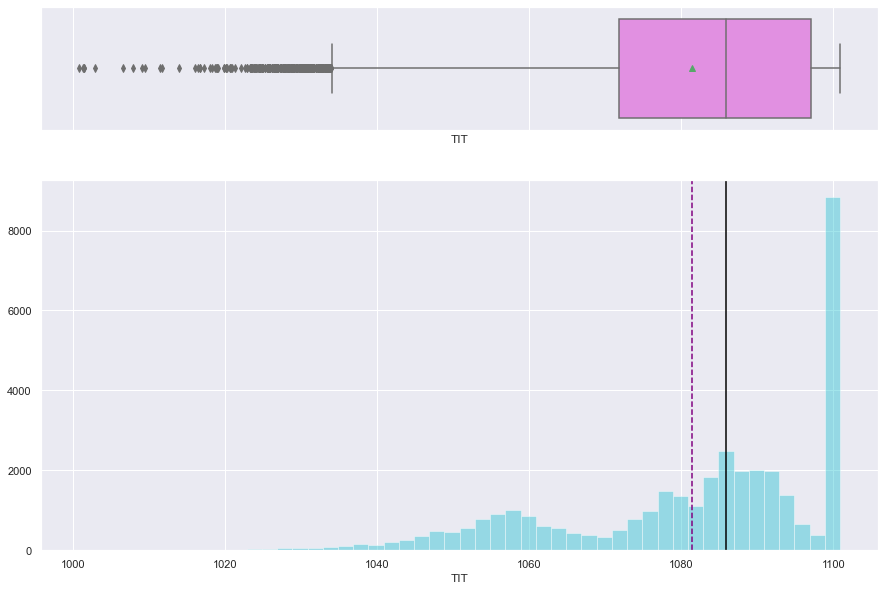

In [14]:
histogram_boxplot(df["TIT"])

* The distribution of TIT is skewed to the left.
* Most of the value counts are between 1081 and 1101 Celsius, with a fair amount of outliers to the left of the 1037 Celsius mark.

#### Observations on Turbine After Temperature

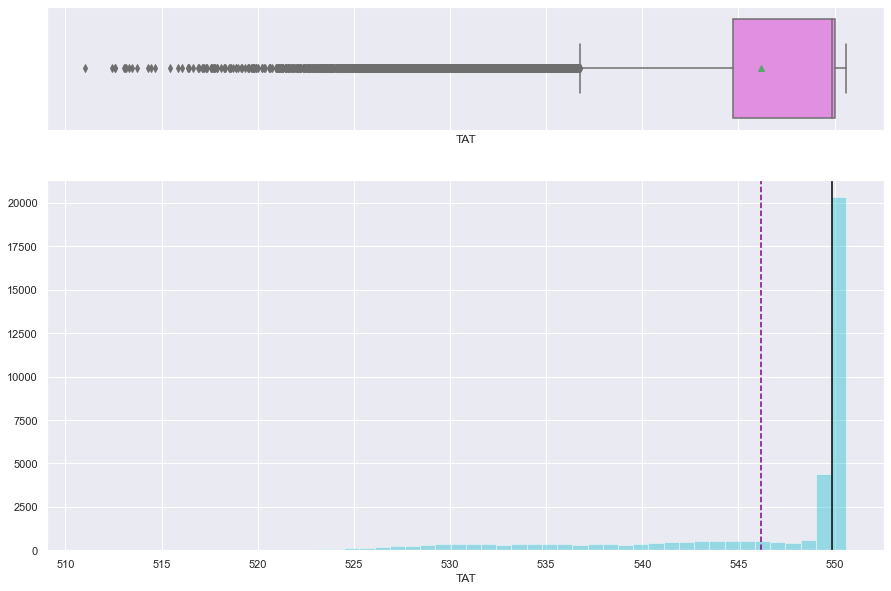

In [15]:
histogram_boxplot(df["TAT"])

* The distribution of TAT is skewed to the left.
* The outlet temperature is at 550 Celcius most of the time, with outliers to the left of the 537 Celcius mark. 

#### Observations on Compressor Discharge Pressure

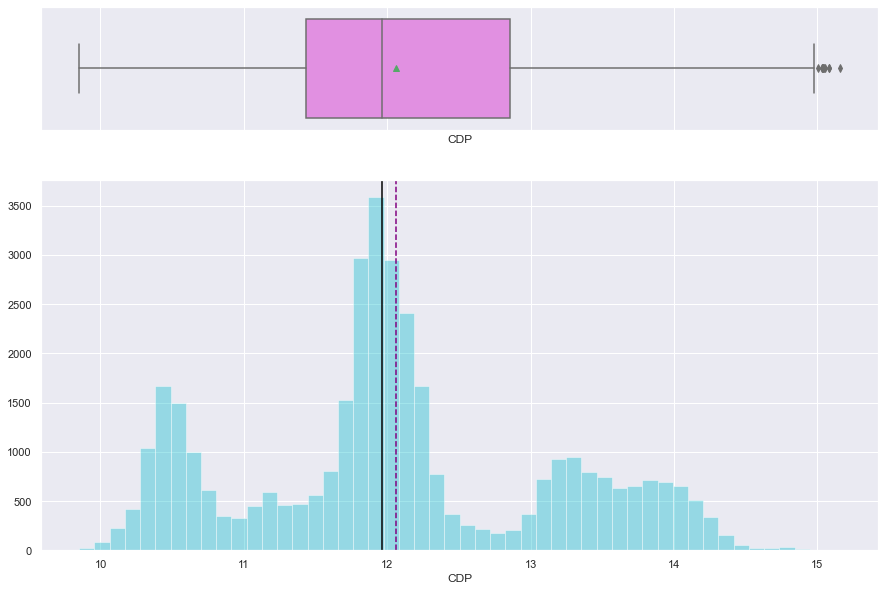

In [16]:
histogram_boxplot(df["CDP"])

* The distribution of CDP shows three peaks like the GTEP feature and is related to exhaust or discharge component of the turbine. Might be indicative of some correlation. The peaks are at 10.5, 12, and 13.5 mbar for the 5 year duration. 

#### Observations on Turbine Energy Yield

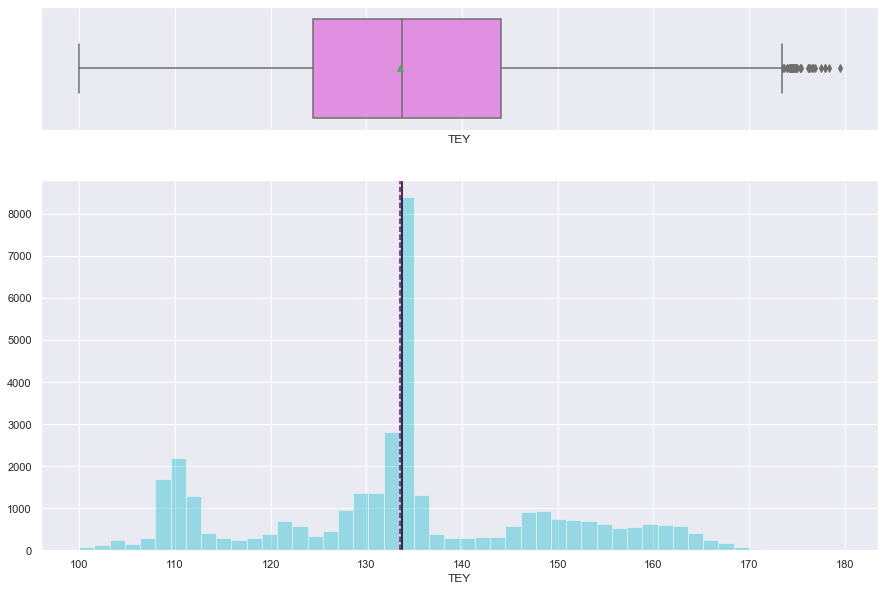

In [17]:
histogram_boxplot(df["TEY"])

* The value with the most frequency of occurence is an energy yield of approx. 134 MWH.
* There's a couple outliers to the right of the upper whisker at 173 MWH.

#### Observations on Carbon Monoxide

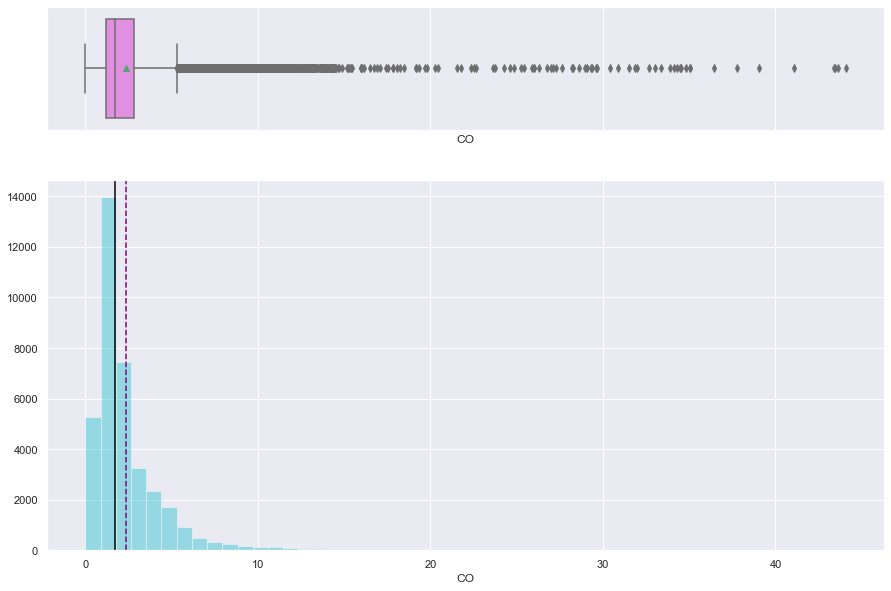

In [18]:
histogram_boxplot(df["CO"])

* Distribution is highly right skewed
* Majority of the count fall between 0 and 3 mg/m3 which is a good sign indicating very low flue emmissions most of the time.
* There's still a couple outliers to the right at really high values as high as 44 mg/m3. (Not a good sign)

#### Observations on Nitrogen Oxides

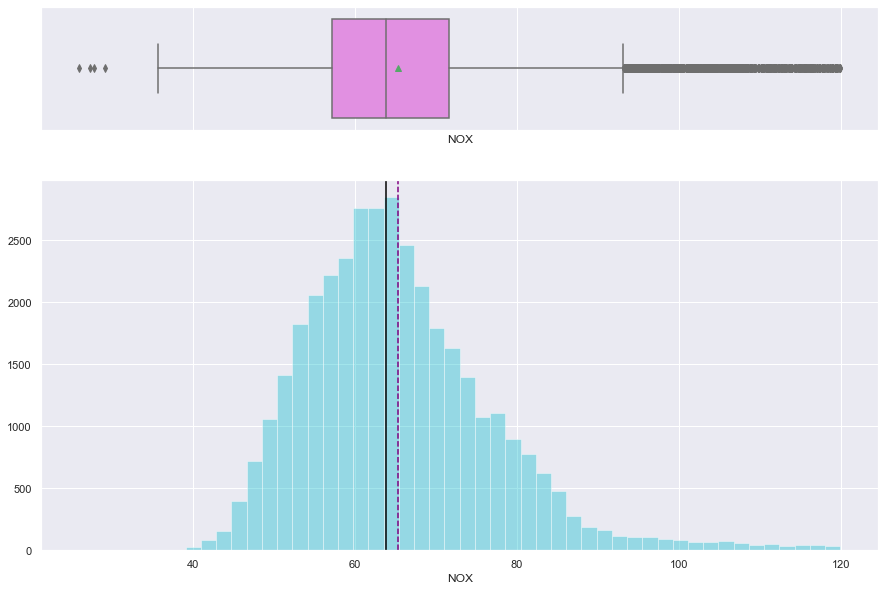

In [19]:
histogram_boxplot(df["NOX"])

* Distribution is right skewed
* Majority of the count fall between 50 and 75 mg/m3. Comparing this to CO count above, this might be seen as a troubling score. Would be interesting to find out how this high emmisions are handled. 

### Bivariate analysis

#### Correlation

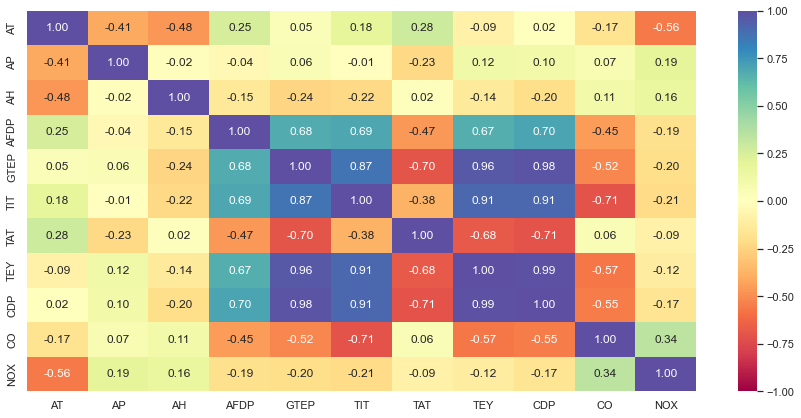

In [20]:
# Creating a heat map for the numerical features
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

* There are a lot of strong correlations between both target variable TEY, and some independent variables.
* Compressor Discharge Pressure has a positive relation with the target.
* Gas Turbine Exhaust Pressure has a positive relation with Compressor Discharge Pressure.
* Gas Turbine Exhaust Pressure has a positive relation with the target.
* Turbine Inlet Temperature has a positive relation with the target.
* Compressor Discharge Pressure has a positive relation with the Turbine Inlet Temperature.
* Gas Turbine Exhaust Pressure has a positive relation with the Turbine Inlet Temperature.
* Compressor Discharge Pressure has a positive relation with the Air Filter Difference Pressure.
* Turbine Inlet Temperature has a positive relation with the Air Filter Difference Pressure.
* Gas Turbine Exhaust Pressure has a positive relation with the Air Filter Difference Pressure.
* Air Filter Difference Pressure has a positive relation with the target.

* Turbine Inlet Temperature has a negative relation with Carbon Monoxide.
* Turbine After Temperature has a negative relation with Compressor Discharge Pressure.
* Turbine After Temperature has a negative relation with Gas Turbine Exhaust Pressure.
* Turbine After Temperature has a negative relation with the target.
* Will need to find a way to get rid of multicolinearity before doing further analysis.

#### Observations oF Carbon Monoxide against Turbine Energy Yield

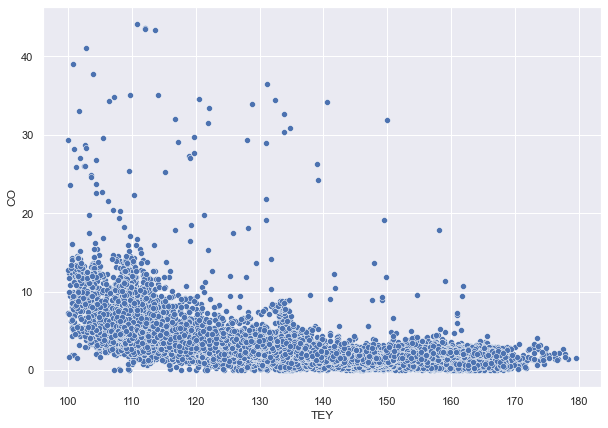

In [21]:
plt.figure(figsize=(10, 7))
sns.scatterplot(y="CO", x="TEY", data=df)
plt.show()

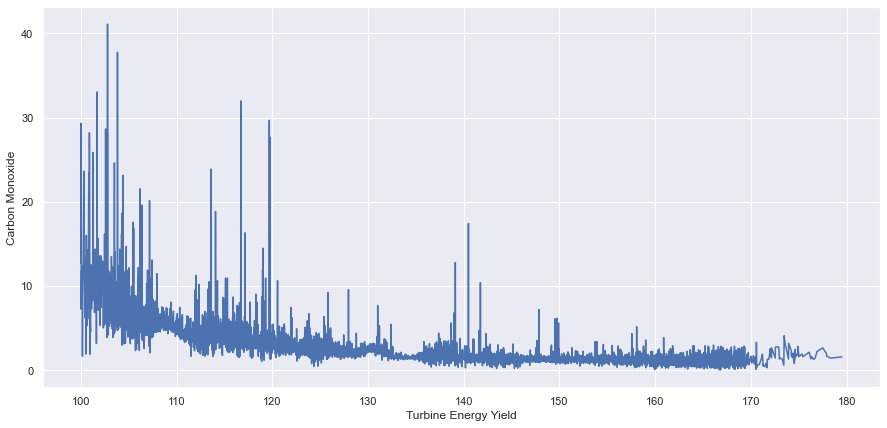

In [22]:
# Plotting TEY against Carbon Monoxide
plt.figure(figsize=(15,7))
sns.lineplot(x="TEY", y="CO", ci=2, data=df)
plt.ylabel('Carbon Monoxide')
plt.xlabel('Turbine Energy Yield')
plt.show()

* Notice that at TEY values greater than 120 MWH, its almost guaranteed that we have Carbon Monoxide readings less than 10 mg/m3. 
* Once we go lower than 120 MWH, we start seeing values as high as 30 to 44 mg/m3. That's rediculously high.

#### Observations oF Compressor Discharge Pressure against Turbine Energy Yield

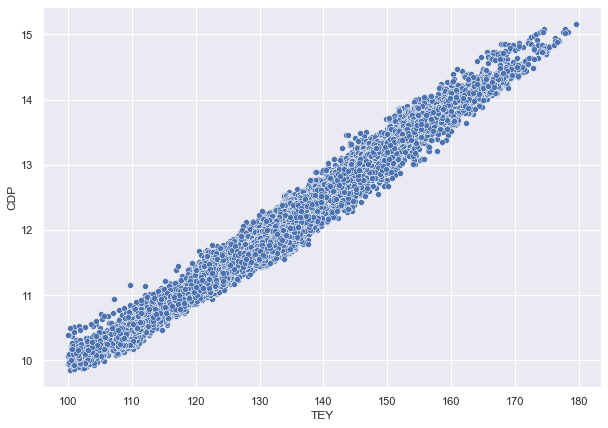

In [23]:
plt.figure(figsize=(10, 7))
sns.scatterplot(y="CDP", x="TEY", data=df)
plt.show()

* There's a huge correlation between CDP and TEY. 
* As TEY increases, CDP increases drastically. 

#### Observations oF Turbine Inlet Temperature against Turbine Energy Yield

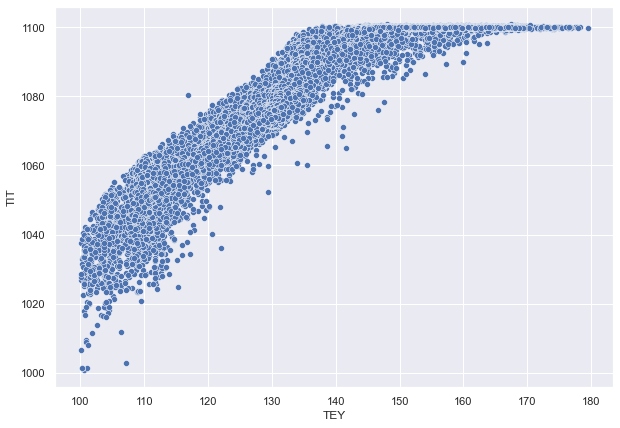

In [24]:
plt.figure(figsize=(10, 7))
sns.scatterplot(y="TIT", x="TEY", data=df)
plt.show()

* From the graph we see that at about 135 MWH of TEY value, any further increase in TEY would cause no increase to the Turbine Inlet Temperature. This temperature limit is around 1100 Celcius.
* It would make sense to not continue increasing temperature past the 1100 Celsius mark just to get higher TEY as one might end up reducing equipment lifetime.

### Data Pre-Processing

* There are many outliers in the data which we will treat (perform capping of outliers).
* All the values smaller than the lower whisker will be assigned the value of the lower whisker, and all the values above the upper whisker will be assigned the value of the upper whisker.

**Outliers detection using boxplot**

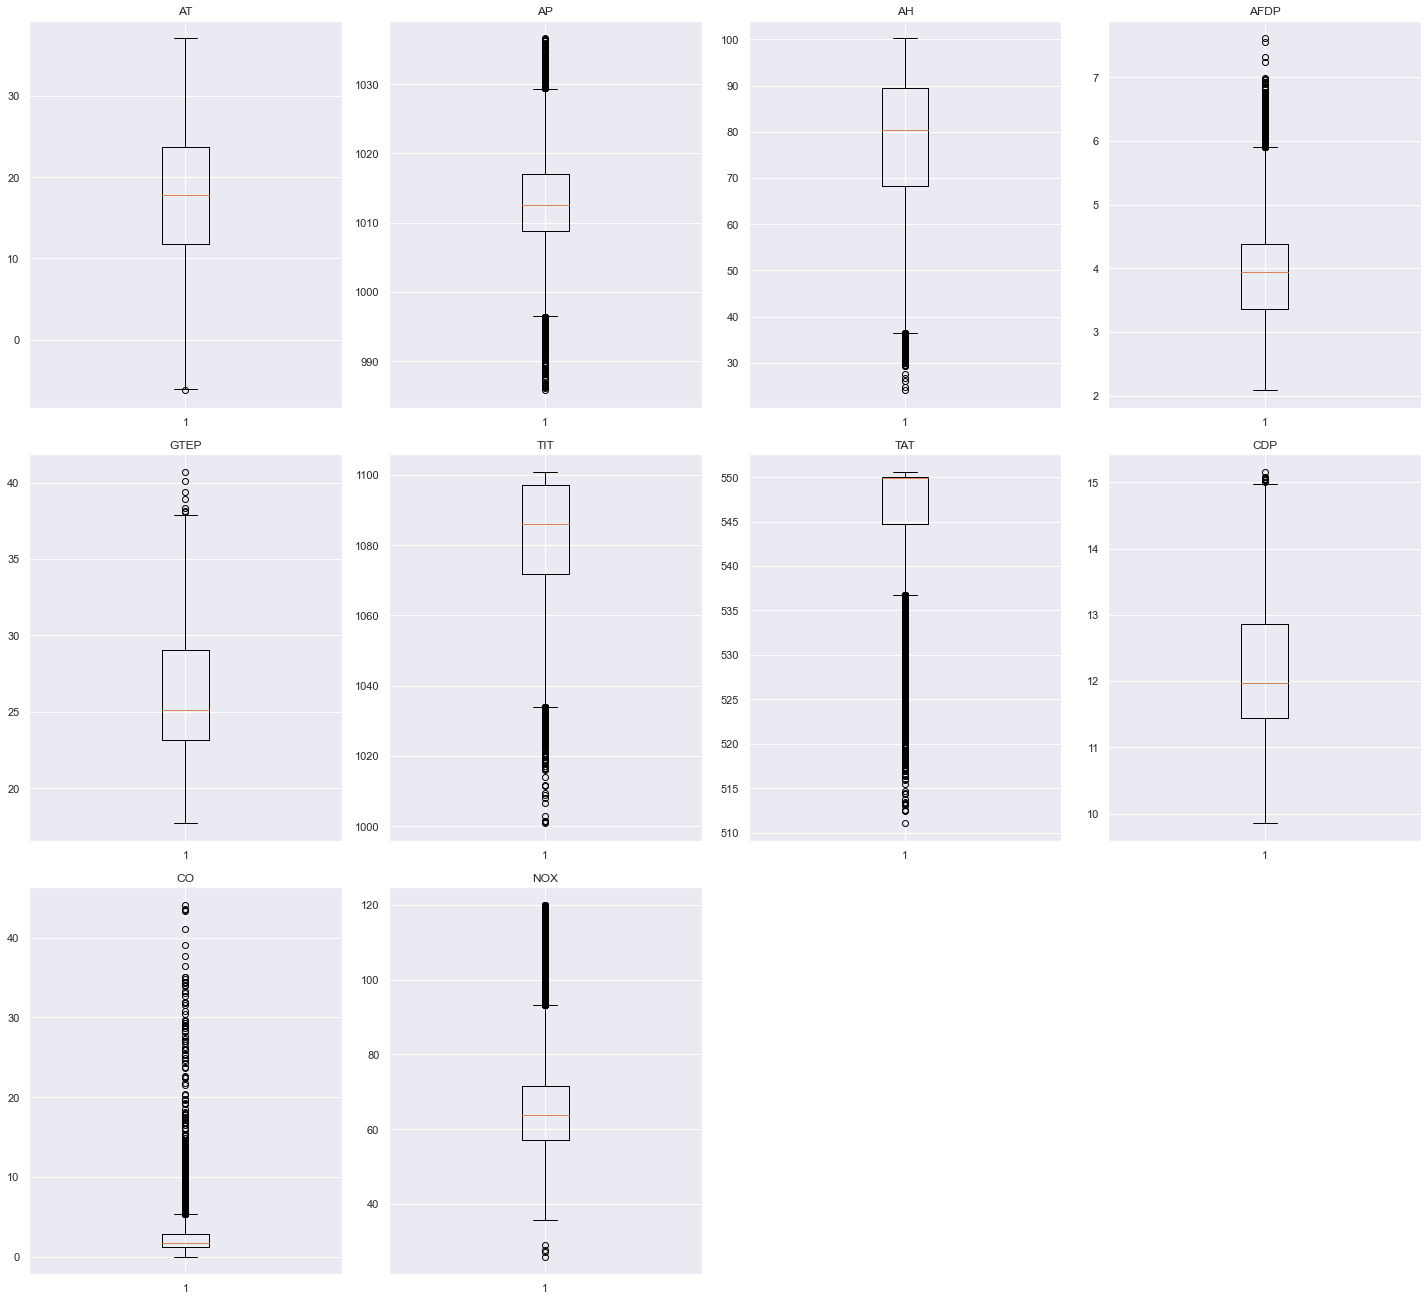

In [25]:
df.drop(['TEY'], axis=1, inplace=True)

plt.figure(figsize=(20, 30))

for i, variable in enumerate(df):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

* Ambient Temperature and Nitrogen Oxides have both upper and lower outliers. 
* Ambient Humidity, Turbine Inlet Temperature, and Turbine After Temperature have just lower outliers. 
* Air Filter Difference Pressure, Gas Turbine Exhaust Pressure, Compressor Discharge Pressure, and Carbon Monoxide have upper outliers.

### Treating Outliers

In [26]:
# functions to treat outliers by flooring and capping


def treat_outliers(df, col):
    """
    Treats outliers in a variable

    df: dataframe
    col: dataframe column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)

    return df


def treat_outliers_all(df, col_list):
    """
    Treat outliers in a list of variables

    df: dataframe
    col_list: list of dataframe columns
    """
    for c in col_list:
        df = treat_outliers(df, c)

    return df

In [27]:
df = treat_outliers_all(df, df)

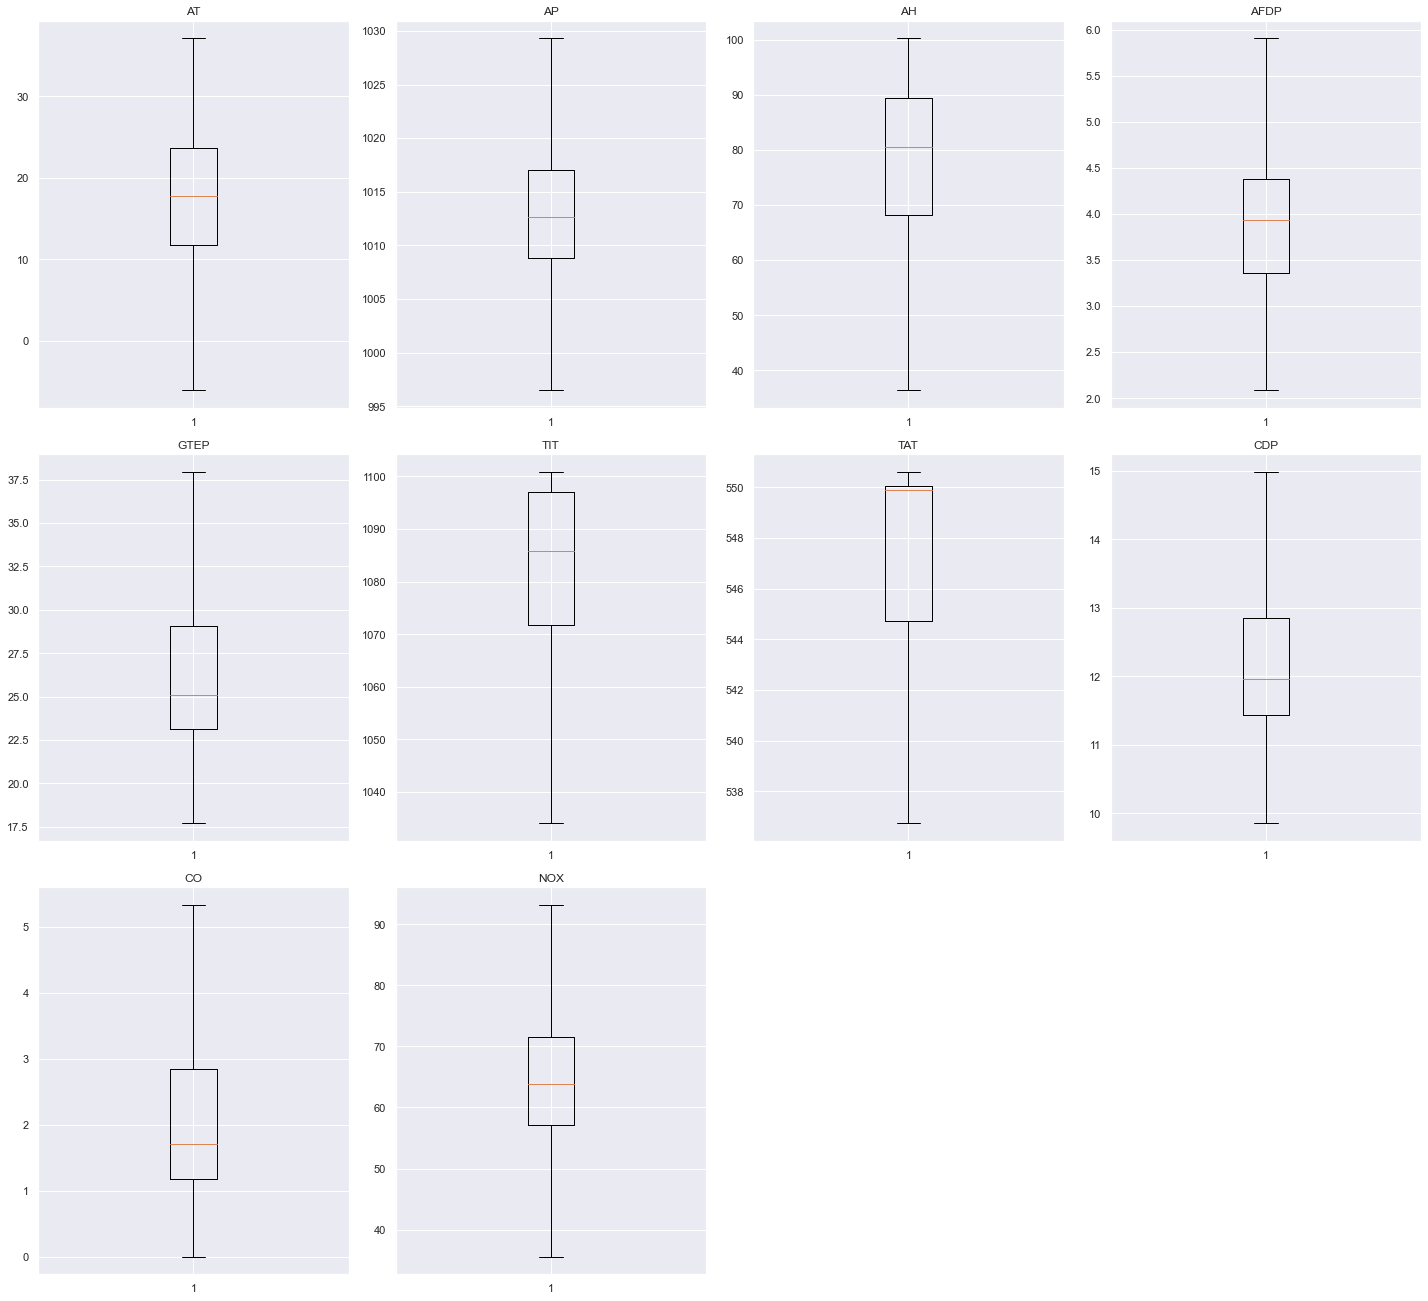

In [28]:
# let's look at box plot to see if outliers have been treated or not
plt.figure(figsize=(20, 30))

for i, variable in enumerate(df):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

**Creating training and test sets.**

In [29]:
X = df
Y = Energy_Yield["TEY"]

# adding constant
X = sm.add_constant(X)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

In [30]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)


Shape of Training set :  (25713, 11)
Shape of test set :  (11020, 11)


### Multiple Linear Regression (with statsmodels library)

In [31]:
olsmodel = sm.OLS(y_train, X_train).fit()
print(olsmodel.summary())

                            OLS Regression Results                            
Dep. Variable:                    TEY   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                 6.953e+05
Date:                Thu, 03 Nov 2022   Prob (F-statistic):               0.00
Time:                        20:37:17   Log-Likelihood:                -35205.
No. Observations:               25713   AIC:                         7.043e+04
Df Residuals:                   25702   BIC:                         7.052e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -132.9668      1.709    -77.802      0.0

**Let's check the performance of the model using different metrics.**

* We will be using metric functions defined in sklearn for RMSE, MAE, and $R^2$.
* We will define a function to calculate MAPE and adjusted $R^2$.
    - The mean absolute percentage error (MAPE) measures the accuracy of predictions as a percentage, and can be calculated as the average absolute percent error for each predicted value minus actual values divided by actual values. It works best if there are no extreme values in the data and none of the actual values are 0.
    
* We will create a function which will print out all the above metrics in one go.

In [32]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [33]:
# checking model performance on train set 
print("Training Performance\n")
olsmodel_train_perf = model_performance_regression(olsmodel, X_train, y_train)
olsmodel_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.951416,0.741375,0.996317,0.996316,0.558865


In [34]:
# checking model performance on test set (seen 30% data)
print("test Performance\n")
olsmodel_test_perf = model_performance_regression(olsmodel, X_test, y_test)
olsmodel_test_perf

test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.961382,0.752997,0.996143,0.996139,0.568141


**Observations**

- The training $R^2$ is 0.996, so the model is not underfitting.

- The train and validation RMSE and MAE are comparable, so the model is not overfitting either.

- MAE suggests that the model can predict TEY within a mean error of 0.7 on the validation data.

- MAPE of 0.56 on the validation data means that we are able to predict within 0.57% of the TEY.

## Checking Linear Regression Assumptions

We will be checking the following Linear Regression assumptions:

1. **No Multicollinearity**

2. **Linearity of variables**

3. **Independence of error terms**

4. **Normality of error terms**

5. **No Heteroscedasticity**

### TEST FOR MULTICOLLINEARITY

* **General Rule of thumb**:
    - If VIF is between 1 and 5, then there is low multicollinearity.
    - If VIF is between 5 and 10, we say there is moderate multicollinearity.
    - If VIF is exceeding 10, it shows signs of high multicollinearity.

In [35]:
# we will define a function to check VIF
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [36]:
checking_vif(X_train)

,feature,VIF
0,const,82934.472325
1,AT,3.848928
2,AP,1.392901
3,AH,1.744727
4,AFDP,2.444663
5,GTEP,29.069854
6,TIT,33.652078
7,TAT,8.814231
8,CDP,91.164382
9,CO,2.966809


* `TAT` has VIF slightly greater than 5.
* `GTEP`, `TIT`, and `CDP` have VIF scoreS much greater than 5.
    * Clearly these 3 variables are correlated with each other.
    * This does seem to make intuitive sense because they are all directly associated with the end product or exhaust.

### Removing Multicollinearity

In [37]:
# Let's define a function that will help us do this.
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

In [38]:
col_list = [
    "TAT",
    "TIT",
    "GTEP",
    "CDP",
]

res = treating_multicollinearity(X_train, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,TAT,0.996315,0.951753
1,GTEP,0.996135,0.974740
2,TIT,0.994863,1.123639
3,CDP,0.990753,1.507577


* Dropping `CDP` would have the maximum impact on the predictive power of the model (amongst the variables being considered).
* We'll drop `TAT` and check the VIF again.

In [39]:
col_to_drop = "TAT"
X_train2 = X_train.loc[:, ~X_train.columns.str.startswith(col_to_drop)]
X_test2 = X_test.loc[:, ~X_test.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(X_train2)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  TAT


,feature,VIF
0,const,70150.460820
1,AT,3.413148
2,AP,1.392874
3,AH,1.681140
4,AFDP,2.431536
5,GTEP,28.946582
6,TIT,11.422893
7,CDP,44.001606
8,CO,2.956742
9,NOX,1.808649


* Dropping `TAT` has brought the VIF of `TIT` lower but its still greater than 5.
* `GTEP` and `CDP` still have a VIF score of much greater than 5.

In [40]:
col_list = [
    "TIT",
    "GTEP",
    "CDP",
]

res = treating_multicollinearity(X_train2, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,GTEP,0.996135,0.974727
1,TIT,0.992231,1.381881
2,CDP,0.984549,1.948791


- Dropping `GTEP` next.

In [41]:
col_to_drop = "GTEP"
X_train3 = X_train2.loc[:, ~X_train2.columns.str.startswith(col_to_drop)]
X_test3 = X_test2.loc[:, ~X_test2.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(X_train3)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  GTEP


,feature,VIF
0,const,68175.709935
1,AT,3.412591
2,AP,1.312592
3,AH,1.619282
4,AFDP,2.421225
5,TIT,11.210967
6,CDP,9.725358
7,CO,2.913987
8,NOX,1.782719


* Dropping `GTEP` has brought the VIF of `CDP` much lower but still a bit higher than 5.
* `TIT` remained about the same VIF score.

In [42]:
col_list = [
    "CDP",
    "TIT",
]

res = treating_multicollinearity(X_train3, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,TIT,0.992209,1.383871
1,CDP,0.930639,4.128987


- We will drop `TIT` next.

In [43]:
col_to_drop = "TIT"
X_train4 = X_train3.loc[:, ~X_train3.columns.str.startswith(col_to_drop)]
X_test4 = X_test3.loc[:, ~X_test3.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(X_train4)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  TIT


,feature,VIF
0,const,35332.283527
1,AT,2.941008
2,AP,1.312068
3,AH,1.606829
4,AFDP,2.417456
5,CDP,3.363219
6,CO,2.002862
7,NOX,1.651127


- **The above predictors have no multicollinearity and the assumption is satisfied.**
- **Let's check the model summary.**

In [44]:
olsmod1 = sm.OLS(y_train, X_train4).fit()
print(olsmod1.summary())

                            OLS Regression Results                            
Dep. Variable:                    TEY   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 4.678e+05
Date:                Thu, 03 Nov 2022   Prob (F-statistic):               0.00
Time:                        20:37:39   Log-Likelihood:                -44835.
No. Observations:               25713   AIC:                         8.969e+04
Df Residuals:                   25705   BIC:                         8.975e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         52.4718      1.622     32.346      0.0

**Observations**

- We can see that adj. R-squared has dropped from 0.996 to 0.992, which shows that the dropped columns did not have much effect on the model.
- As there is no multicollinearity, we can look at the p-values of predictor variables to check their significance.
- There are no p-values greater than 0.05, so we will not be dropping any as a result


### TEST FOR LINEARITY AND INDEPENDENCE

In [45]:
# let us create a dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsmod1.fittedvalues  # predicted values
df_pred["Residuals"] = olsmod1.resid  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
12993,109.24,108.543715,0.696285
18742,108.56,107.565014,0.994986
13512,135.71,133.711239,1.998761
26170,127.14,127.166522,-0.026522
26875,122.53,123.045684,-0.515684


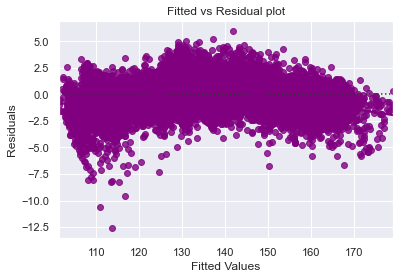

In [46]:
# let's plot the fitted values vs residuals

sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

* The scatter plot shows the distribution of residuals (errors) vs fitted values (predicted values).

* If there exist any pattern in this plot, we consider it as signs of non-linearity in the data and a pattern means that the model doesn't capture non-linear effects.

* **We see no pattern in the plot above. Hence, the assumptions of linearity and independence are satisfied.**

### TEST FOR NORMALITY

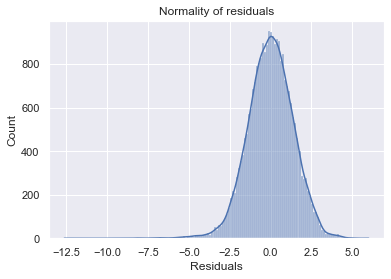

In [47]:
# drawing histigram of df_pred
sns.histplot(data=df_pred, x="Residuals", kde=True)
plt.title("Normality of residuals")
plt.show()

- The histogram of residuals does have a bell shape.
- Let's check the Q-Q plot.

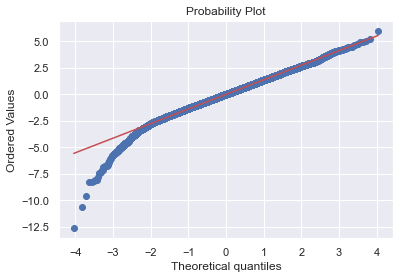

In [48]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

- The residuals more or less follow a straight line except for the tails.
- However, as an approximation, we can accept this distribution as close to being normal.
- **So, the assumption is satisfied.**

### TEST FOR HOMOSCEDASTICITY

In [49]:
# If the variance of the residuals is symmetrically distributed across the regression line, then the data is said to be homoscedastic.
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], X_train4)
lzip(name, test)

[('F statistic', 0.9828963610317786), ('p-value', 0.8358934179809501)]

**Since p-value > 0.05, we can say that the residuals are homoscedastic. So, this assumption is satisfied.**

**Now that we have checked all the assumptions of linear regression and they are satisfied, let's go ahead with prediction.**

In [50]:
# predictions on the test set
pred = olsmod1.predict(X_test4)

df_pred_test = pd.DataFrame({"Actual": y_test, "Predicted": pred})
df_pred_test.sample(10, random_state=1)

,Actual,Predicted
36111,130.78,131.451830
30689,129.46,127.893835
32486,147.76,144.300356
27022,121.71,122.573905
27084,121.81,122.131019
26007,128.18,128.504213
34479,148.22,147.186323
8024,163.37,164.690503
25465,127.89,127.235526
20852,134.13,132.052478


- We can observe here that our model has returned pretty good prediction results, and the actual and predicted values are comparable.

- We can also visualize comparison result as a bar graph.

**Note**: As the number of records is large, for representation purpose, we are taking a sample of 25 records only.

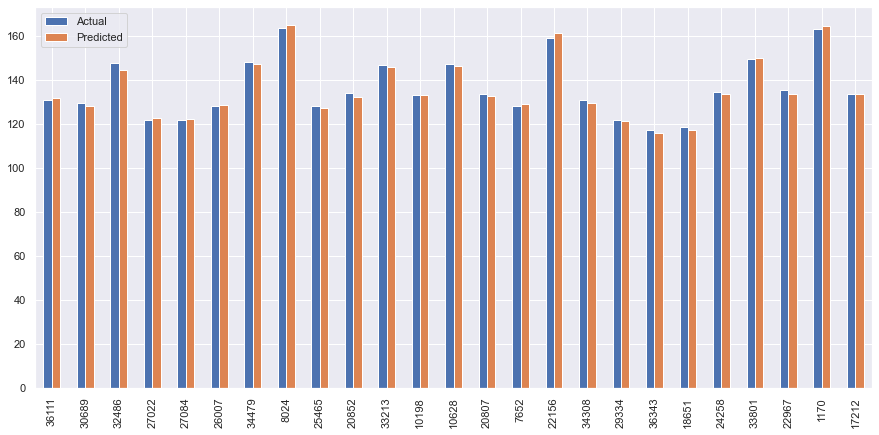

In [51]:
df1 = df_pred_test.sample(25, random_state=1)
df1.plot(kind="bar", figsize=(15, 7))
plt.show()

In [52]:
# checking model performance on train set
print("Training Performance\n")
olsmod1_train_perf = model_performance_regression(olsmod1, X_train4, y_train)
olsmod1_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,1.383656,1.079945,0.992211,0.992208,0.822651


In [53]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmod1_test_perf = model_performance_regression(olsmod1, X_test4, y_test)
olsmod1_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,1.395357,1.090291,0.991874,0.991869,0.829806


* The model is able to explain ~99% of the variation in the data, which is excellent.

* The train and test RMSE and MAE are low and comparable. So, our model is not suffering from overfitting.

* The MAPE on the test set suggests we can predict within 8.2% of the Turbine Energy Yield. 

* Hence, we can conclude the model *olsmod1* is good for prediction as well as inference purposes.

**Let's compare the initial model created with sklearn and the final statsmodels model.**

In [54]:
# training performance comparison

models_train_comp_df = pd.concat(
    [olsmodel_train_perf.T, olsmod1_train_perf.T],
    axis=1,
)

models_train_comp_df.columns = [
    "Linear Regression (all variables)",
    "Linear Regression (selected variables)",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Linear Regression (all variables),Linear Regression (selected variables)
RMSE,0.951416,1.383656
MAE,0.741375,1.079945
R-squared,0.996317,0.992211
Adj. R-squared,0.996316,0.992208
MAPE,0.558865,0.822651


In [55]:
# test performance comparison

models_test_comp_df = pd.concat(
    [olsmodel_test_perf.T, olsmod1_test_perf.T],
    axis=1,
)

models_test_comp_df.columns = [
    "Linear Regression (all variables)",
    "Linear Regression (selected variables)",
]

print("Test performance comparison:")
models_test_comp_df

Test performance comparison:


,Linear Regression (all variables),Linear Regression (selected variables)
RMSE,0.961382,1.395357
MAE,0.752997,1.090291
R-squared,0.996143,0.991874
Adj. R-squared,0.996139,0.991869
MAPE,0.568141,0.829806


* The performance of the two models is close to each other.

**Let's recreate the final statsmodels model and print it's summary to gain insights.**

In [56]:
olsmodel_final = sm.OLS(y_train, X_train4).fit()
print(olsmodel_final.summary())

                            OLS Regression Results                            
Dep. Variable:                    TEY   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 4.678e+05
Date:                Thu, 03 Nov 2022   Prob (F-statistic):               0.00
Time:                        20:39:15   Log-Likelihood:                -44835.
No. Observations:               25713   AIC:                         8.969e+04
Df Residuals:                   25705   BIC:                         8.975e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         52.4718      1.622     32.346      0.0

## Insights

1. Compressor Discharge Pressure come out to be very significant, as expected. As it increases, Turbine Energy Yield also increases as represented by the positive coefficient sign.


2. An increase in Energy Yield seems to also insinuate reduction in flue gas emmissions (Carbon Monoxide and Nitrogen Oxides) as shown by the negative coefficient signs of both gases.


3. Only CDP is positively related to the target variable. All other final features have negative coefficients indicating that they decrease as TEY increases and vice versa.

4. CO is much more adversely affected than NOX.

4. Given how important reduced flue gas emmissions are, the company should look to produce energy of not less than 120 MWH, as this has been initially shown to be the point at which lower values would lead to drastic increases in CO output.

## Reference

1. Heysem, K., Erdinas, U., & Patnar, T. (2019, November 29). Gas Turbine CO and NOx Emission Data Set Data Set. Retrieved November 3, 2022, from UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Gas+Turbine+CO+and+NOx+Emission+Data+Set

